<a href="https://colab.research.google.com/github/FilLTP89/teaching/blob/master/Exercise_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Identification of non-linear soil properties under different loading conditions 

In this practical session, you will learn how:
+ to identify the non-linear behaviour of a soil sample, given different loading conditions
+ soil behaviour is affected by each identified parameter
+ soil behaviour evolves from natural to critical states

This notebook will guide you through the different learning tasks. 

**You are required to complete the missing parts, tagged with the #[COMPLETE] tag.**

## Required modules 
(see *python-hands-on.ipynb* for details on `numpy` and `matplotlib` tutorials)

In [0]:
import numpy as np

In [0]:
import matplotlib.pyplot as plt
from matplotlib import cm 
from mpl_toolkits.mplot3d import axes3d, Axes3D
%matplotlib inline

In [0]:
from IPython.display import Latex, display


### Disambiguation 
The rates of a _state variable_ $\square$ are either represented by $d\square$, $\delta\square$ or with a dot $\dot{\square}$. 

_Effective stress states_ are noted with an apostrophe ($\square'$).

Apices $el$ and $ir$ stand for _elastic_ and _irreversible_.

Pedex $\square_v$ indicate volumetric component.

wrt = with respect to

## Set-up
Given the results of a _drained isotropic compression test_ on a soil sample, the following _elasto-plastic_ model is chosen to represent soil behaviour at best:

$$\large
f(p',\varepsilon_v^{ir}) = p'-d\cdot p_c(\varepsilon_v^{ir}) \cdot \alpha (\varepsilon_v^{ir})
$$

where $p'$ represents the _effective pressure_ (_idrostatic stress_), $d$ is a generic parameter,  $\alpha$ and $p_c$ are the _hardening_ variables, depending on the evolution of the _irreversible volumetric strain_ $\varepsilon_v^{ir}$:

$$\large
\alpha(\varepsilon_v^{ir})=\alpha_0+\frac{\varepsilon_v^{ir}}{a+\varepsilon_v^{ir}}
$$

$$\large
p_c(\varepsilon_v^{ir})=p_{c0}\cdot \exp{\beta\cdot\varepsilon_v^{ir}}
$$

$p_{c0}$ represents the _critic pressure_ at the initial state. $\alpha_0$, $a$ and $\beta$ are two generic model's parameters. 

The _elastic_ behaviour of the soil sample is defined by the following _isotropic linear_ incremental relationship:

$$\large
dp' = K\cdot d\varepsilon_v^{el}
$$
with $K$ representing the _bulk modulus_ (_isotropic elastic stiffness_) and $d\varepsilon_v^{el}$

## Task 1
The purpose of this task is to study the influence of each parameter on the model presented above. 
To this end, for each material property, two possible values are provided, so to assess the influence of the inherent parameter and compare the final outcomes.

Given the sets of material properties listed below:
+ plot the variation of $\alpha$ wrt $\varepsilon_v^{ir}$
+ plot the variation of $p_c$ wrt $\varepsilon_v^{ir}$
+ plot the variation of the _void index_ $e$ (how is it related to the volumetric strain?) wrt to $p'$, for an _isotropic consolidation test_ from $p_0$ to $p_{end}$

Parameters:
$$\large
\alpha_0=[0.1,0.2];\quad
a = [0.01,0.1];\quad
d = [2,10];\quad
\beta = 32;\quad
K = 320 MPa;\quad
p_0=30 kPa;\quad
e_0 = 0.7;\quad
p_{c0}= [220,420] kPa;\quad
p_{end} = 30 MPa
$$

with $e_0$ representing the _initial void ratio_.

44.0 kPa


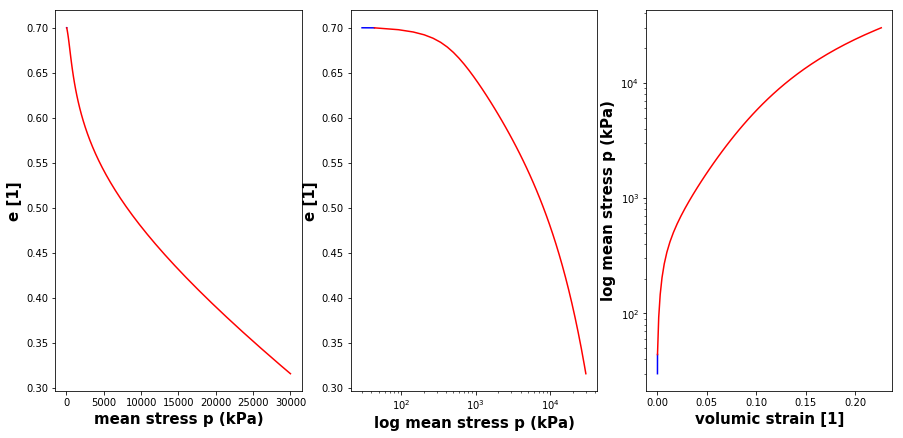

In [6]:
# Data
d=2
p_C0=220
beta=32
alpha_0=0.1
a=0.01
K=320000.
e_0=0.7
p_0=30. #kPa
p_end=30000. #kPa

# Compute yielding limit
p_lim=d*p_C0*alpha_0
print('{:>.1f} kPa'.format(p_lim))

# Draw evolution e=f(p') for elasticity
p_el=np.array([p_0,p_lim])
eps_V_el=(1/K)*p_el
e_el=e_0-(1+e_0)*eps_V_el

# Plot 
fig, ((ax1, ax2, ax3)) = plt.subplots(1,3,figsize=(15, 7))

ax1.plot(p_el,e_el,'b')
ax1.set_xlabel('mean stress p (kPa)',fontsize=15,fontweight='bold')
ax1.set_ylabel('e [1]',fontsize=15,fontweight='bold')


ax2.semilogx(p_el,e_el,'b')
ax2.set_xlabel('log mean stress p (kPa)',fontsize=15,fontweight='bold')
ax2.set_ylabel('e [1]',fontsize=15,fontweight='bold')

ax3.semilogy(eps_V_el,p_el,'b')
ax3.set_xlabel('volumic strain [1]',fontsize=15,fontweight='bold')
ax3.set_ylabel('log mean stress p (kPa)',fontsize=15,fontweight='bold')


## Elasto-plastic evolution
inr = 1.1 # Geometric increment ratio
m = int(np.log((p_end/p_lim)*(inr-1.)+1.)/np.log(inr))+1
p_ep=p_lim*np.ones((m,))
for i in range(1,m-1):
    p_ep[i]=p_ep[i-1]+p_lim*inr**i
p_ep[-1]=p_end

# initialization
dp = np.zeros((p_ep.size,))
H = np.zeros((p_ep.size,))
alpha = np.zeros((p_ep.size,))
p_C = np.zeros((p_ep.size,))
epsVp = np.zeros((p_ep.size,))
depsV = np.zeros((p_ep.size,))
epsV = np.zeros((p_ep.size,))
epsV[0] = eps_V_el[-1]
e_ep = np.zeros((p_ep.size,))
e_ep[0] = e_el[-1]


for i in range(p_ep.size-1):
    dp[i]=p_ep[i+1]-p_ep[i]
    alpha[i]=alpha_0+(epsVp[i]/(a+epsVp[i]))
    p_C[i]=p_C0*np.exp(beta*epsVp[i])
    H[i]=-d*p_C[i]*a/((a+epsVp[i])**2)-d*alpha[i]*beta*p_C[i]
    depsV[i]=dp[i]*((1/K)-(1/H[i]))
    epsV[i+1]=epsV[i]+depsV[i]
    epsVp[i+1]=epsVp[i]+(depsV[i]-(1/K)*dp[i])
    e_ep[i+1]=e_0-epsV[i+1]*(1+e_0)
    
ax1.plot(p_ep,e_ep,'r')
ax2.semilogx(p_ep,e_ep,'r')
ax3.semilogy(epsV,p_ep,'r')